In [1]:
import sys
sys.path.insert(0, '../')

## Geometries

In [1]:
import yuntu.core.geometry.base as geom

Geometry objects serve to delimit regions of the time-frequency space, and can be used to annotate or cut out portions of media objects. Yuntu offers the following types of geometries

In [2]:
for x in geom.Geometry.Types:
    print(x)

Types.Weak
Types.TimeLine
Types.TimeInterval
Types.FrequencyLine
Types.FrequencyInterval
Types.BBox
Types.Point
Types.LineString
Types.Polygon
Types.MultiPoint
Types.MultiLineString
Types.MultiPolygon


All geometries implement the following methods:
* `buffer`:
    Generates a new geometry that contains the original geometry but has an extra buffer around the original geometry.
* `shift`:
    Generates a new geometry that results from translating the original geometry.
* `scale`:
    Generates a new geometry that results from scaling the original geometry.
* `transform`:
    Generates a new geometry that results from applying a transformation to all the points in the original geometry.
* `intersects`:
    Checks if the current geometry intersects another object. The other object can be a Yuntu `Window`, another Yuntu `Geometry` or a shapely `Geometry`.
* `plot`

All Yuntu geometries contain a shapely geometry which can be accesed through the `geometry` attribute.

#### Weak Geometry

The weak geometry is a trivial geometry meant to represent all of time-frequency space. All of the geometric methods mentioned are trivial.

In [3]:
weak = geom.Weak()

In [4]:
print(weak.buffer(10) == weak)
print(weak.shift(time=10) == weak)

True
True


#### Time Line Geometry

Time lines are of the form

$$ TimeLine(time=t_0) = \left\{ (t, f) \mid t = t_0 \right\} $$

In [5]:
time_line = geom.TimeLine(time=1) 

True


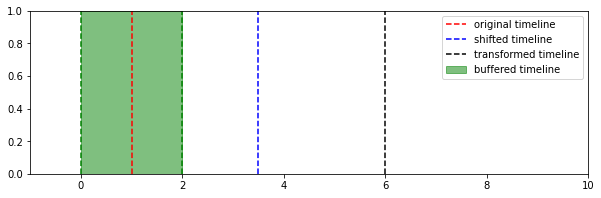

In [6]:
# Plot timeline
ax = time_line.plot(figsize=(10, 3), color='red', label='original timeline')

# Buffer timeline
buffer = time_line.buffer(1)
buffer = time_line.buffer(time=1)
buffer = time_line.buffer(buffer=[1, 0]) # buffer argument can be a pair of numbers (time, freq)

# Plot buffer
buffer.plot(ax=ax, color='green', label='buffered timeline')

# Shift timeline
shift = time_line.shift(2.5)
shift = time_line.shift(time=2.5)
shift = time_line.shift(shift=[2.5, 0]) # shift argument can be a pair of numbers (time, freq)

# Plot shift
shift.plot(ax=ax, color='blue', label='shifted timeline')

# Scale timeline
scale = time_line.scale(2) # scale method is trivial for timeline geometries
print(scale == time_line)

# Transform timeline
transform = time_line.transform(lambda x: max(6, 4 * x - 2))

# Plot transform
transform.plot(ax=ax, color='black', label='transformed timeline')

ax.set_xlim(-1, 10);
ax.legend();

#### Time Interval Geometry

A time interval is of the form

$$ TimeInterval(start\_time=t_0, end\_time=t_1) = \left\{ (t, f) \mid t_0 \leq t \leq t_1 \right\} $$

In [7]:
time_interval = geom.TimeInterval(start_time=1, end_time=2)

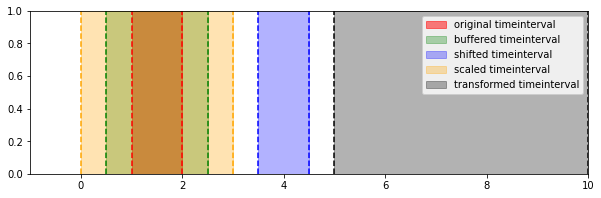

In [8]:
# Plot timeinterval
ax = time_interval.plot(figsize=(10, 3), color='red', label='original timeinterval')

# Buffer timeinterval
buffer = time_interval.buffer(0.5)
buffer = time_interval.buffer(time=0.5)

# buffer argument can be a pair of numbers (time, freq).
# The frequency component is ignored
buffer = time_interval.buffer(buffer=[0.5, 0])

# Plot buffer
buffer.plot(ax=ax, color='green', label='buffered timeinterval', alpha=0.3)

# Shift time interval
shift = time_interval.shift(2.5)
shift = time_interval.shift(time=2.5)

# shift argument can be a pair of numbers (time, freq).
# The frequency component is ignored
shift = time_interval.shift(shift=[2.5, 0]) 

# Plot shift
shift.plot(ax=ax, color='blue', label='shifted timeinterval', alpha=0.3)

# Scale timeinterval
scale = time_interval.scale(3)
scale = time_interval.scale(time=3)
scale = time_interval.scale(scale=[3, 0]) # scale argument can be a pair of numbers (time, freq)

# Plot scale
scale.plot(ax=ax, color='orange', label='scaled timeinterval', alpha=0.3)

# Transform timeinterval
transform = time_interval.transform(lambda x: (x + 1)**2 + 1)

# Plot transform
transform.plot(ax=ax, color='black', label='transformed timeinterval', alpha=0.3)

ax.set_xlim(-1, 10);
ax.legend();

Additionally, `TimeInterval` geometries have `start_line`, `center_line` and `end_line` attributes which return a `TimeLine` geometry at the start, center and end of the `TimeInterval`.

In [9]:
start_line = time_interval.start_line
center_line = time_interval.center_line
end_line = time_interval.end_line

print(f'Start line = {start_line}')
print(f'Center line = {center_line}')
print(f'End line = {end_line}')

Start line = TimeLine(time=1.0)
Center line = TimeLine(time=1.5)
End line = TimeLine(time=2.0)


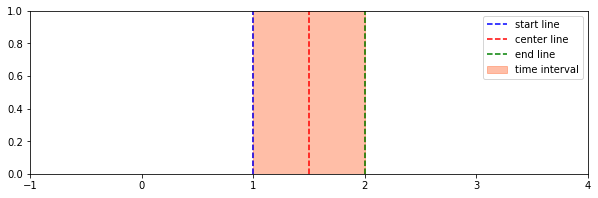

In [10]:
# Plot time interval
ax = time_interval.plot(figsize=(10, 3), color='coral', label='time interval')

# Plot start/center/end lines
start_line.plot(ax=ax, color='blue', label='start line')
center_line.plot(ax=ax, color='red', label='center line')
end_line.plot(ax=ax, color='green', label='end line')

ax.set_xlim(-1, 4);
ax.legend();

#### Frequency Line and Interval Geometries

Frequency lines and intervals are very similar to time lines and intervals.

$$ FrequencyLine(freq=f_0) = \left\{ (t, f) \mid f = f_0 \right\} $$

$$ FrequencyInterval(min\_freq=f_0, max\_freq=f_1) = \left\{ (t, f) \mid f_0 \leq f \leq f_1 \right\} $$

In [11]:
freq_line = geom.FrequencyLine(freq=1000)

False


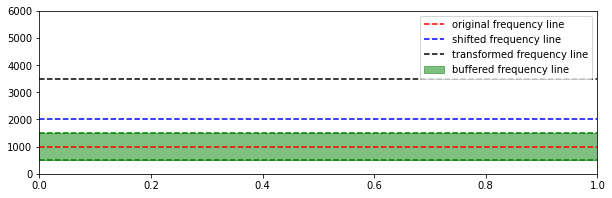

In [12]:
# Plot timeline
ax = freq_line.plot(figsize=(10, 3), color='red', label='original frequency line')

# Buffer timeline
buffer = freq_line.buffer(500)
buffer = freq_line.buffer(freq=500)
buffer = freq_line.buffer(buffer=[0, 500]) # buffer argument can be a pair of numbers (time, freq)

# Plot buffer
buffer.plot(ax=ax, color='green', label='buffered frequency line')

# Shift timeline
shift = freq_line.shift(1000)
shift = freq_line.shift(freq=1000)
shift = freq_line.shift(shift=[0, 1000]) # shift argument can be a pair of numbers (time, freq)

# Plot shift
shift.plot(ax=ax, color='blue', label='shifted frequency line')

# Scale timeline
scale = freq_line.scale(2) # scale method is trivial for timeline geometries
print(scale == time_line)

# Transform timeline
transform = freq_line.transform(lambda x: 4 * x - 500)

# Plot transform
transform.plot(ax=ax, color='black', label='transformed frequency line')

ax.set_ylim(0, 6000);
ax.legend();

In [13]:
freq_interval = geom.FrequencyInterval(min_freq=1000, max_freq=2000)

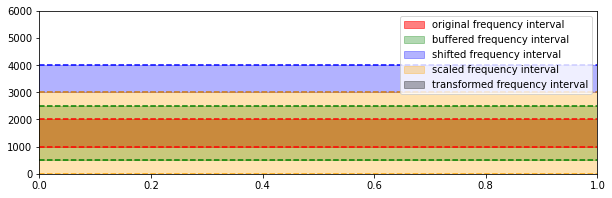

In [14]:
# Plot frequency interval
ax = freq_interval.plot(figsize=(10, 3), color='red', label='original frequency interval')

# Buffer frequency interval
buffer = freq_interval.buffer(500)
buffer = freq_interval.buffer(freq=500)

# buffer argument can be a pair of numbers (time, freq).
# The time component is ignored
buffer = freq_interval.buffer(buffer=[0, 500])

# Plot buffer
buffer.plot(ax=ax, color='green', label='buffered frequency interval', alpha=0.3)

# Shift frequency interval
shift = freq_interval.shift(2000)
shift = freq_interval.shift(freq=2000)

# shift argument can be a pair of numbers (time, freq).
# The time component is ignored
shift = freq_interval.shift(shift=[0, 2000]) 

# Plot shift
shift.plot(ax=ax, color='blue', label='shifted frequency interval', alpha=0.3)

# Scale frequency interval
scale = freq_interval.scale(3)
scale = freq_interval.scale(freq=3)
scale = freq_interval.scale(scale=[0, 3]) # scale argument can be a pair of numbers (time, freq)

# Plot scale
scale.plot(ax=ax, color='orange', label='scaled frequency interval', alpha=0.3)

# Transform frequency interval
transform = freq_interval.transform(lambda x: (x + 1)**2 + 1)

# Plot transform
transform.plot(ax=ax, color='black', label='transformed frequency interval', alpha=0.3)

ax.set_ylim(0, 6000);
ax.legend();

In [15]:
min_line = freq_interval.min_line
center_line = freq_interval.center_line
max_line = freq_interval.max_line

In [16]:
print(f'Min line = {min_line}')
print(f'Center line = {center_line}')
print(f'Max line = {max_line}')

Min line = FrequencyLine(freq=1000.0)
Center line = FrequencyLine(freq=1500.0)
Max line = FrequencyLine(freq=2000.0)


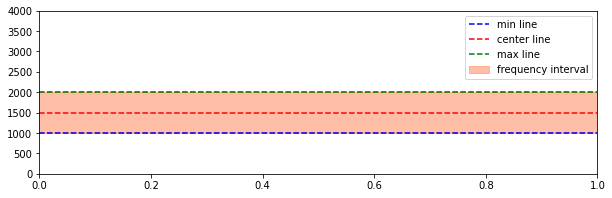

In [17]:
# Plot time interval
ax = freq_interval.plot(figsize=(10, 3), color='coral', label='frequency interval')

# Plot start/center/end lines
min_line.plot(ax=ax, color='blue', label='min line')
center_line.plot(ax=ax, color='red', label='center line')
max_line.plot(ax=ax, color='green', label='max line')

ax.set_ylim(0, 4000);
ax.legend();

#### Bounding Box Geometry

A bounding box is of the form

$$ BBox(start\_time=t_0, end\_time=t_1, min\_freq=f_0, max\_freq=f_1) = \left\{(t, f) \mid t_0 \leq t \leq t_1 \& f_0 \leq f \leq f_1 \right\} $$

In [18]:
bbox = geom.BBox(start_time=1, end_time=2, min_freq=1000, max_freq=2000)

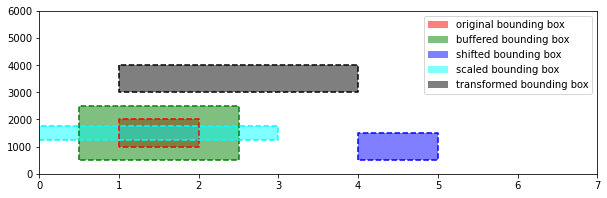

In [19]:
# Plot timeline
ax = bbox.plot(figsize=(10, 3), color='red', label='original bounding box')

# Buffer timeline
buffer = bbox.buffer(time=0.5, freq=500)
buffer = bbox.buffer(buffer=[0.5, 500]) # buffer argument can be a pair of numbers (time, freq)

# Plot buffer
buffer.plot(ax=ax, color='green', label='buffered bounding box')

# Shift timeline
shift = bbox.shift(time=3, freq=-500)
shift = bbox.shift(shift=[3, -500]) # shift argument can be a pair of numbers (time, freq)

# Plot shift
shift.plot(ax=ax, color='blue', label='shifted bounding box')

# Scale timeline
scale = bbox.scale(time=3, freq=0.5)
scale = bbox.scale(scale=[3, 0.5]) # scale argument can be a pair of numbers (time, freq)

# Plot scale
scale.plot(ax=ax, color='cyan', label='scaled bounding box')

# Transform timeline
transform = bbox.transform(lambda x, y: (x**2, 5000 - y))

# Plot transform
transform.plot(ax=ax, color='black', label='transformed bounding box')

ax.set_xlim(0, 7);
ax.set_ylim(0, 6000);
ax.legend();

A bounding box has the time and frequency ranges as attributes.

In [20]:
time_interval = bbox.time_range
freq_interval = bbox.frequency_range
center = bbox.center

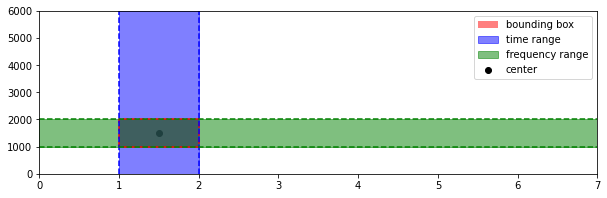

In [21]:
# Plot timeline
ax = bbox.plot(figsize=(10, 3), color='red', label='bounding box')

time_interval.plot(ax=ax, color='blue', label='time range')
freq_interval.plot(ax=ax, color='green', label='frequency range')
center.plot(ax=ax, color='black', label='center')

ax.set_xlim(0, 7);
ax.set_ylim(0, 6000);
ax.legend();

#### LineString Geometry

A linestring geometry is formed by fragments of lines specified from a list of adjacent vertices.

In [22]:
linestring = geom.LineString(vertices=[(0, 0), (1, 1000), (4,1000), (5, 0)])

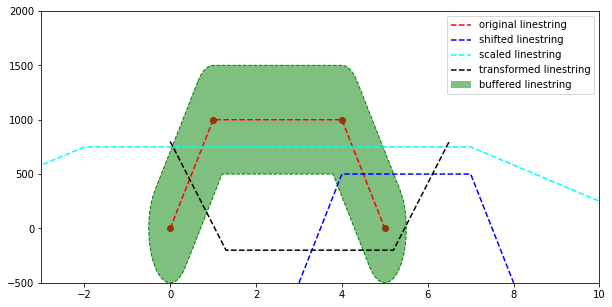

In [23]:
# Plot linestring
# When scatter=True the vertices will also be plotted
ax = linestring.plot(figsize=(10, 5), color='red', label='original linestring', scatter=True)

# Buffer linestring
buffer = linestring.buffer(time=0.5, freq=500)
buffer = linestring.buffer(buffer=[0.5, 500]) # buffer argument can be a pair of numbers (time, freq)

# Plot buffer
buffer.plot(ax=ax, color='green', label='buffered linestring')

# Shift linestring
shift = linestring.shift(time=3, freq=-500)
shift = linestring.shift(shift=[3, -500]) # shift argument can be a pair of numbers (time, freq)

# Plot shift
shift.plot(ax=ax, color='blue', label='shifted linestring')

# Scale linestring
scale = linestring.scale(time=3, freq=0.5)
scale = linestring.scale(scale=[3, 0.5]) # scale argument can be a pair of numbers (time, freq)

# Plot scale
scale.plot(ax=ax, color='cyan', label='scaled linestring')

# Transform linestring
transform = linestring.transform(lambda x, y: (1.3 * x, 800 - y))

# Plot transform
transform.plot(ax=ax, color='black', label='transformed linestring')

ax.set_xlim(-3, 10);
ax.set_ylim(-500, 2000);
ax.legend();

Additionaly points can be sampled from the curve by using the `interpolate` method which returns a `Point` geometry

Type of sampled point = <class 'yuntu.core.geometry.base.Point'>


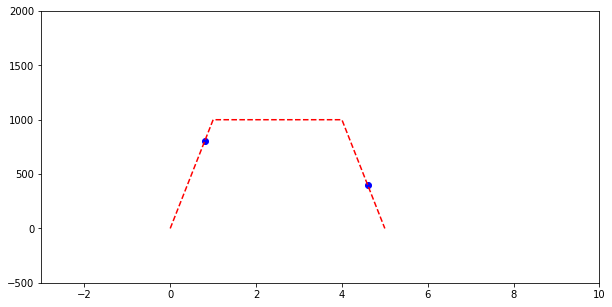

In [24]:
point_1 = linestring.interpolate(0.4)
point_2 = linestring.interpolate(0.8)

print(f'Type of sampled point = {type(point_1)}')

ax = linestring.plot(figsize=(10, 5), color='red')
point_1.plot(ax=ax, color='blue')
point_2.plot(ax=ax, color='blue');

ax.set_xlim(-3, 10);
ax.set_ylim(-500, 2000);

To obtain a copy of the curve but with a higher or lower frequency of vertices use the `resample` method. The resulting vertices are equidistant along the curve.

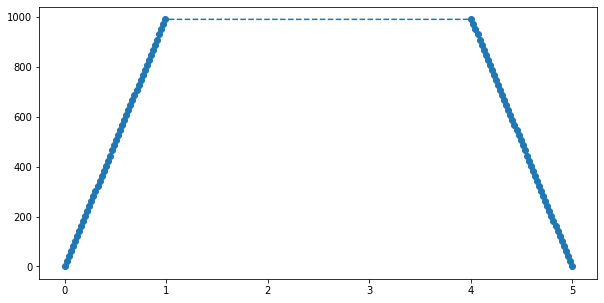

In [25]:
linestring.resample(100).plot(figsize=(10, 5), scatter=True)

Since frequency units are much larger than temporal, this results in the frequency axis having a larger weight in the distance calculation. To modifiy this, use the `ratio` argument in `interpolate` and `resample`. The ratio indicates how many frequency units are equal to a single time unit.

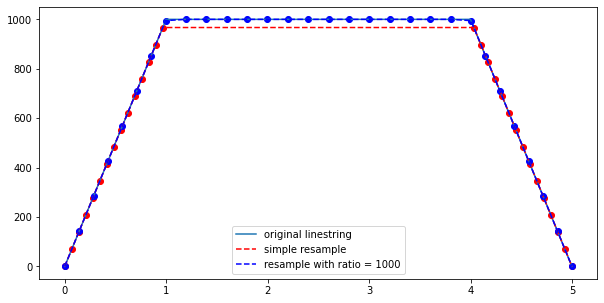

In [26]:
ax = linestring.plot(figsize=(10, 5), linestyle='-', label='original linestring');

resampled1 = linestring.resample(30)
resampled2 = linestring.resample(30, ratio=1000)

resampled1.plot(ax=ax, color='red', scatter=True, label='simple resample')
resampled2.plot(ax=ax, color='blue', scatter=True, label='resample with ratio = 1000')

ax.legend();

The linestring geometry works as a list of points which can be accesed by index or iterated by:

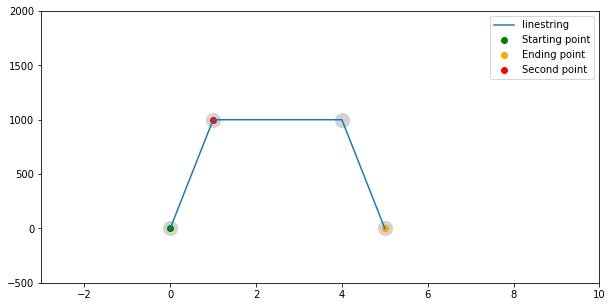

In [27]:
ax = linestring.plot(figsize=(10, 5), linestyle='-', label='linestring');

# Points can be iterated over
for point in linestring:
    point.plot(ax=ax, color='lightgray', size=200)
    
# The first and last point can be accessed as attributes
starting_point = linestring.start
ending_point = linestring.end

starting_point.plot(ax=ax, color='green', label='Starting point')
ending_point.plot(ax=ax, color='orange', label='Ending point')
    
second_point = linestring[1]
second_point.plot(ax=ax, color='red', label='Second point')

ax.set_xlim(-3, 10);
ax.set_ylim(-500, 2000);
ax.legend();

The bounding box of the linestring can be accessed as an attribute

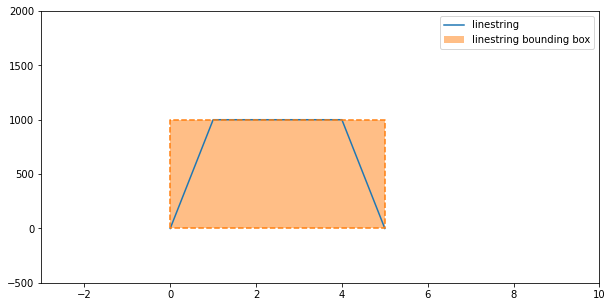

In [28]:
ax = linestring.plot(figsize=(10, 5), linestyle='-', label='linestring');

bbox = linestring.bbox
bbox.plot(ax=ax, label='linestring bounding box')

ax.set_xlim(-3, 10);
ax.set_ylim(-500, 2000);
ax.legend()

#### Polygon Geometries

#### Geometries from Shapely Geometries

In [29]:
import yuntu.core.geometry.base as geom
import shapely.geometry as spg

In [30]:
point = spg.Point(0, 0)
line_string = spg.LineString([(0, 0), (1, 1)])
polygon = spg.Polygon([(0, 0), (1, 0), (0.5, 1)])

In [31]:
yuntu_point = geom.Geometry.from_geometry(point)
yuntu_line_string = geom.Geometry.from_geometry(line_string)
yuntu_polygon = geom.Geometry.from_geometry(polygon)

In [32]:
print('Has the same geometries:')
print(f'Point: {point == yuntu_point.geometry}')
print(f'LineString: {line_string == yuntu_line_string.geometry}')
print(f'Polygon: {polygon == yuntu_polygon.geometry}')

Has the same geometries:
Point: True
LineString: True
Polygon: True
